# Using CellPipeline
## A cell type specific analysis and visualization tool for the gene of interest
<body>
This notebook is built to be run automatically, you can just "Run All" cells. 
Beware: this requires some patience and high computational resources at the moment. 
</body>

First, the data and package are loaded. This may take a minute. 
Set your gene of interest (GOI) here! 

In [10]:
import sys
sys.path.append('/lustre/groups/ml01/workspace/samantha.bening/Bachelor/')
from importlib import reload
import genereporter.cell_pipeline as cp
reload(cp)

cp = cp.CellPipeline("/lustre/groups/ml01/workspace/samantha.bening/Bachelor/", "data2/veo_ibd_balanced.h5ad")

# set your gene of interest
GOI = "CASP8"
# set your cell type of interest
cell_type = 'CD4 T'

Below is a list of possible coarse (level 1) cell types. Choose one of these as your cell type of interest above (<code>cell_type = '[your cell type]'</code>) to run the notebook automatically. Of course, you can rerun certain outputs on different cell types as well. 

In [2]:
# print cell type names here; easier to select
print(f"Coarse cell types: ")
for cell_type in cp.adata.obs['celltype_l2'].unique():
    print(f"\t{str(cell_type)}")

Coarse cell types: 
	Pericyte
	B
	Endothelial
	CD4 T
	CD8 T
	NK_ILC
	Fibroblast
	Cycling B
	Plasma
	Cycling Myeloid
	Cycling Stroma
	Cycling T
	Epithelial
	Glial
	Myeloid
	Tuft
	Smooth Muscle Cell
	pDC
	Mast


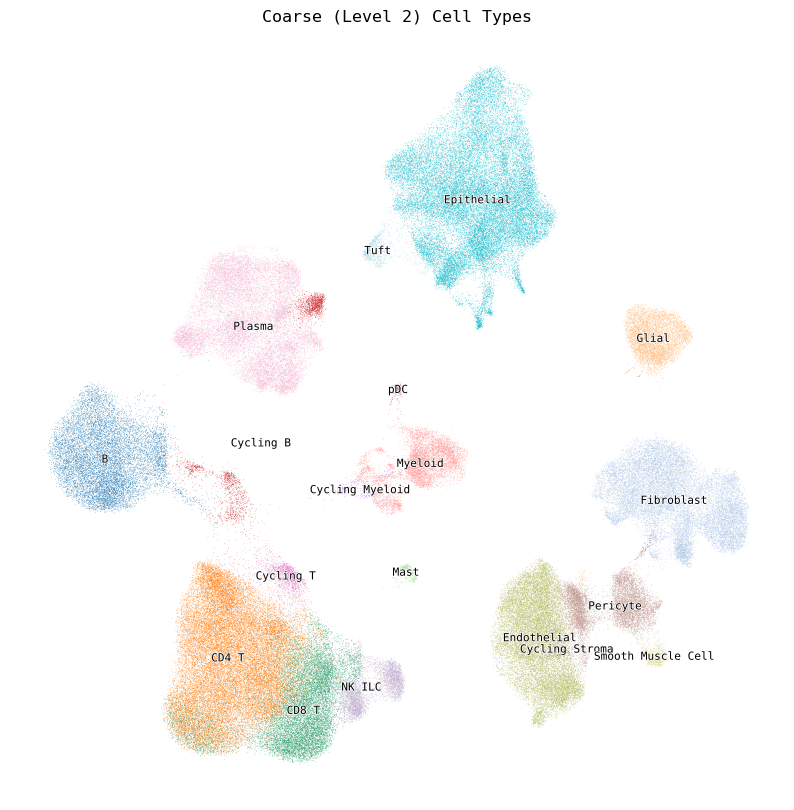

In [3]:
# UMAP of coarse cell types
cp.plot_umap(color="celltype_l2")

Next, we provide a quick summary of the GOI's expression class and mean expression level across all cell types.

In [4]:
expr_sum = cp.explain_expr_celltypes(GOI='CASP8')
expr_sum

,Cell type,Expression class,Avg. expression over cell type
CASP8,pDC,low,0.349
CASP8,CD4 T,very low,0.266
CASP8,Cycling T,very low,0.262
CASP8,CD8 T,very low,0.243
CASP8,NK_ILC,very low,0.240
CASP8,Mast,very low,0.202
CASP8,B,very low,0.140
CASP8,Cycling B,very low,0.122
CASP8,Cycling Myeloid,very low,0.109
CASP8,Plasma,very low,0.109


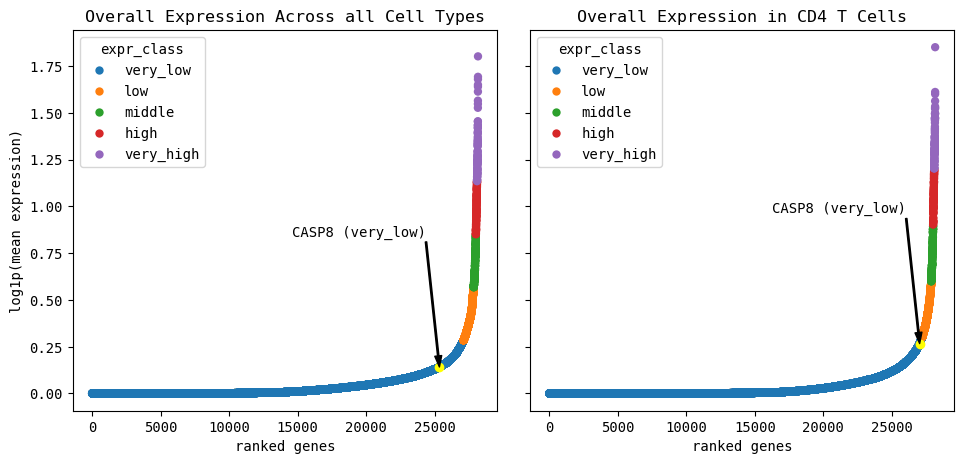

Summary for all cells: 
Quantile thresholds: 
very low: 96.2325, low: 98.8921, middle: 99.4425, high: 99.7479, very high: 99.7500

Number of genes per category: 
very_low: 27101
low: 749
middle: 155
high: 86
very_high: 71


Summary for CD4 T cells: 
Quantile thresholds: 
very low: 96.5912, low: 98.988, middle: 99.4709, high: 99.7479, very high: 99.7500

Number of genes per category: 
very_low: 27202
low: 675
middle: 136
high: 78
very_high: 71



In [11]:
cp.plot_expressions(GOI, cell_type=cell_type, show_summary=True)
# Can change show_summary=False to hide the textual summary of the expression classes (quantile thresholds and cell counts per category)

## Expression vs. Detection visualization
<body>
<br>
This can contextualize the expression levels we observe in the standard scanpy plots. In single-cell RNA-seq, only a random sampling of the RNA present in a cell is selected to be sequenced. By pure chance, lowly expressed genes may not be present in all the sampled RNA due to their low prevalance. Here, we can inspect the maximum percentage of expression expected in all genes, specifically our gene of interest. 
</body>

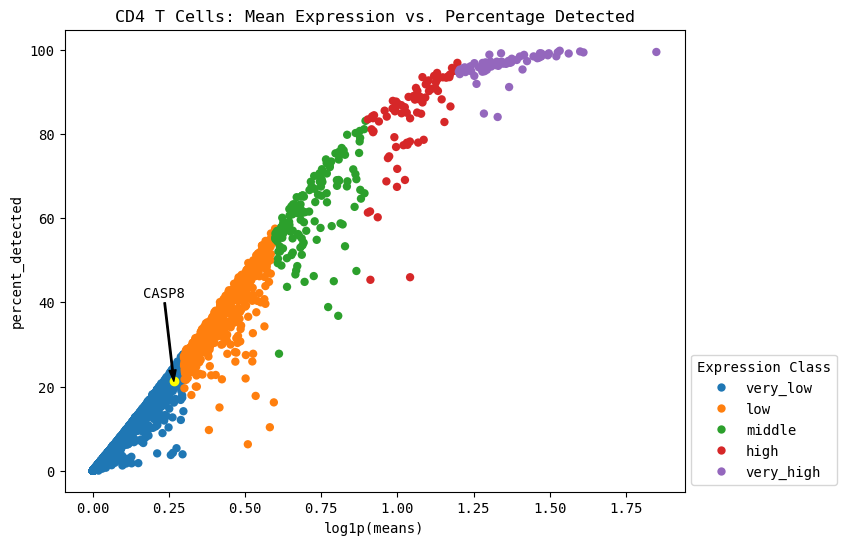

In [12]:
cp.expression_vs_detection(GOI, cell_type=cell_type)
# Can add (or remove) "cell_type=cell_type" to plot only the cell type of interest (or across all cell types)
# todo this section before dotplots etc. 

### Automatically identify lower outliers (clue to look at celltype subset)

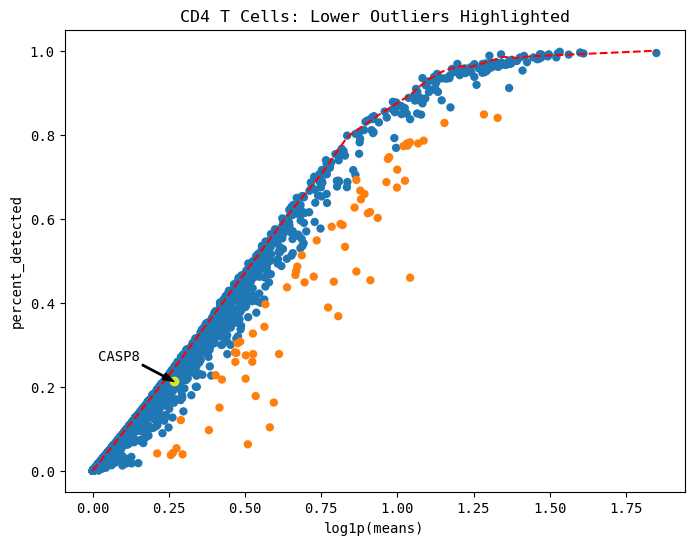

In [13]:
cp.plot_outliers(GOI, outlier_threshold=0.1, cell_type=cell_type)
# Can add "cell_type=cell_type" to plot only the cell type of interest

This is how the maximum threshold curve approximation is calculated. This is primarily interesting for our fundamental understanding of the curve's approximation through the spline's 3rd derivative's change points and the linear approximation of this curve. 

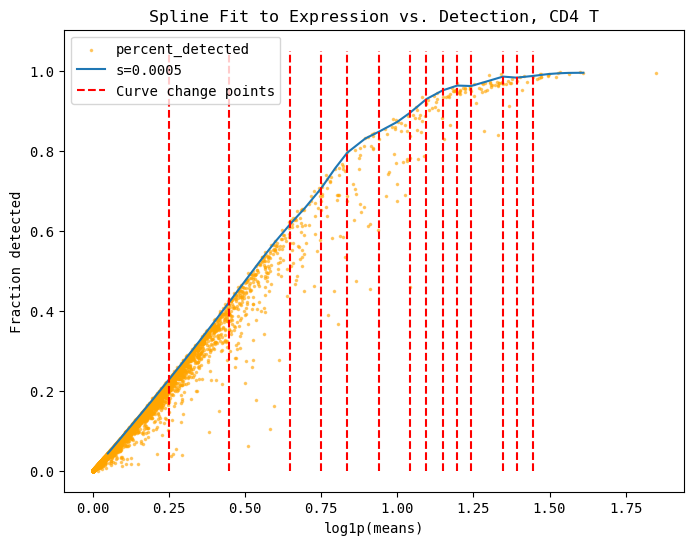

In [14]:
cp.fit_spline(plot=True, cell_type=cell_type)

These are the top 5 number of outliers, sorted by their distance away from the maximum curve. You can show more or less by changing the <code>head=n</code> parameter. 

In [15]:
cp.list_outliers(cell_type=cell_type)

# can show top n number of genes by adding "head=n"

,log1p(means),percent_detected,distance,is_outlier
HSPA1A,1.041783,0.459530,0.394890,True
HSPA1B,0.911569,0.453423,0.339097,True
IGKC,0.581478,0.103288,0.320663,True
KLF2,0.865623,0.474351,0.299710,True
CCL4,0.509195,0.062818,0.299202,True


## GOI expression across cell types
<body>
Now we show the standard scanpy plots of our GOI's expression across both coarse cell types and fine cell types. The fine cell type automatically shown in the one you set at the beginning of this notebook. You can rerun the cell with other cell types of interest by setting the <code>cell_type=['your cell type']</code> parameter. 
</body>

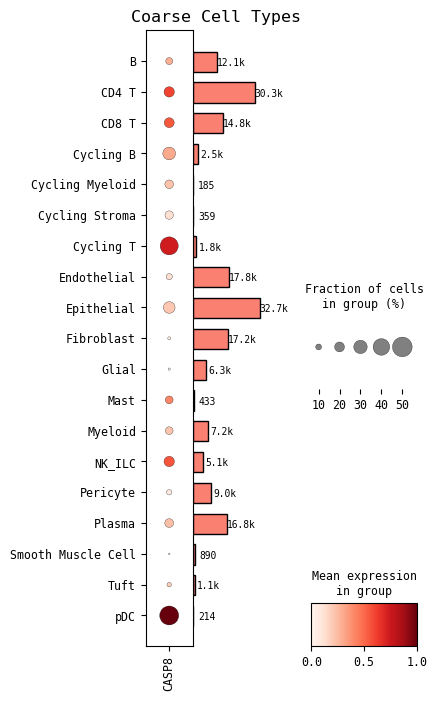

In [23]:
# GOI expression across coarse cell types
cp.dotplot(GOI)

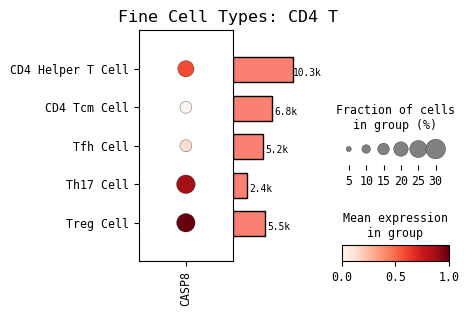

In [17]:
# GOI expression in fine cell type 
cp.dotplot(GOI, cell_type=cell_type)

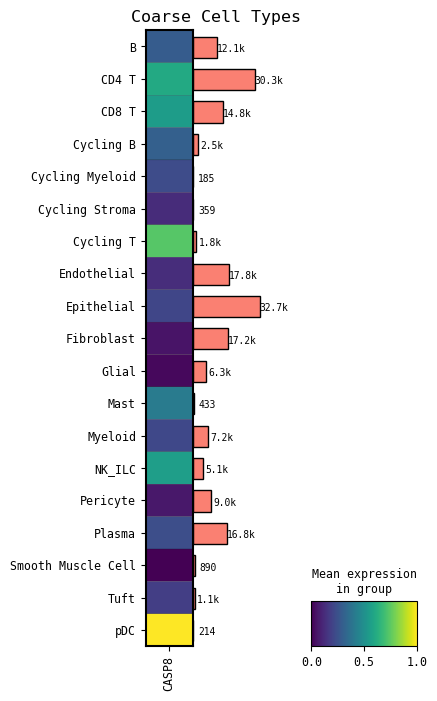

In [21]:
# GOI expression across coarse cell types
# This is similar to the coarse cell type dotplot previously, just a different visualization
cp.matrixplot(GOI)

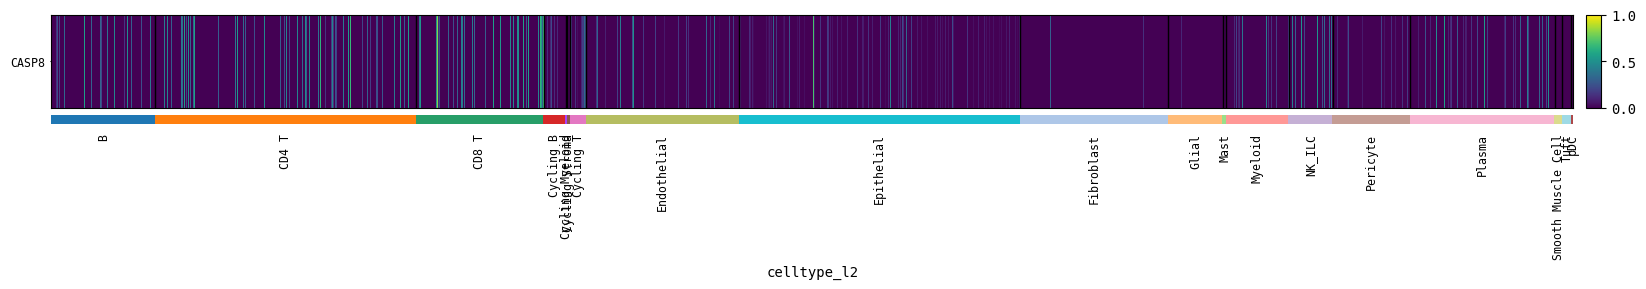

In [19]:
# GOI expression across coarse cell types
# Individual vertical "lines" correspond to individual cells
# A more fine grained visual than the mean expression plots shown before
cp.heatmap(GOI)